In [4]:
import os
import pandas as pd
from rdkit import Chem

import stylia as st
from stylia import (
    ONE_COLUMN_WIDTH,
    TWO_COLUMNS_WIDTH,
    NamedColorMaps,
    NamedColors,
    ContinuousColorMap,
)

data_dir = "../data/"
model_dir = "../models/"
figure_dir = "../figures/"


def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "processed","all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir,"ersilia_models", "all_smiles_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)


df = pd.read_csv(os.path.join(data_dir,"processed", "all_molecules.csv"))
colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")



# Negative Data: InertDB

InertDB is  completely inert subset of ChEMBL

In [5]:
#Do not run again
inertdb = os.path.join(data_dir, "inertdb", "inertdb_cic_v2024.03.smi")
inertdb_smi= []
with open(inertdb, 'r') as file:
    for line in file:
        inertdb_smi.append(line.strip())
print(len(inertdb_smi))
inertdb = pd.DataFrame(inertdb_smi, columns=["SMILES"])
inertdb.to_csv(os.path.join(data_dir, "inertdb", "inertdb.csv"), index=False)

3205


In [12]:
df = load_data("eos2gw4")
print(df.shape)

(835, 1029)


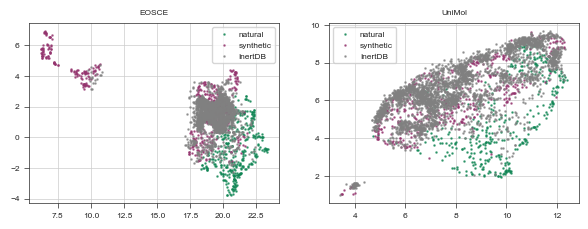

In [18]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 5:]
descs_array = descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 5:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 5:]
inertdb = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb_eos2gw4.csv"))
inertdb = inertdb.dropna()
inertdb_descs=inertdb.iloc[:,2:]
inertdb_array = inertdb_descs.values
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
inertdb_umap = umap_trn.transform(inertdb_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(inertdb_umap)[0],
    np.transpose(inertdb_umap)[1],
    alpha=0.7,
    label="InertDB",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 5:]
descs_array = descs.values

inertdb = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb_eos39co.csv"))
inertdb = inertdb.dropna()
inertdb_descs=inertdb.iloc[:,2:]
inertdb_array = inertdb_descs.values

descs_nat = df[df["category"] == "natural"].iloc[:, 5:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 5:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
inertdb_umap = umap_trn.transform(inertdb_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(inertdb_umap)[0],
    np.transpose(inertdb_umap)[1],
    alpha=0.7,
    label="InertDB",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Negative Data: ChEMBL

Randomly sample a subset of 3000 molecules from ChEMBL35

In [19]:
#Do not run again
df = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_35_chemreps.txt"), delimiter='\t') 
sampled_df = df[['canonical_smiles']].sample(n=3000, random_state=24)
print(sampled_df.shape)
all_smi = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
sampled_df = sampled_df[~sampled_df['canonical_smiles'].isin(all_smi['canonical_smiles'])]
print(sampled_df.shape)
sampled_df.to_csv(os.path.join(data_dir,"chembl",'chembl_smi.csv'), index=False)

(3000, 1)
(3000, 1)


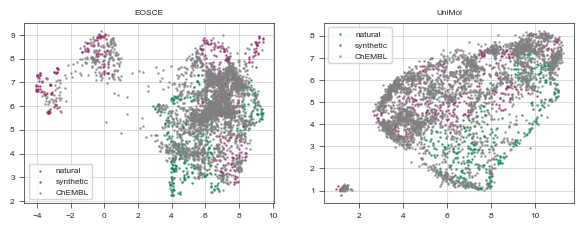

In [20]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 5:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi_eos2gw4.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 5:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 5:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 5:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi_eos39co.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 5:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 5:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Negative Data: COCONUT
Natural product database randomly sampled to obtain 3000 molecules

In [21]:
# do not run again
df = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_csv_lite-04-2025.csv"))
sampled_df = df[['canonical_smiles']].sample(n=3000, random_state=24)
print(sampled_df.shape)
all_smi = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
sampled_df = sampled_df[~sampled_df['canonical_smiles'].isin(all_smi['canonical_smiles'])]
print(sampled_df.shape)
sampled_df.to_csv(os.path.join(data_dir,"coconut",'coconut_smi.csv'), index=False)

/tmp/ipykernel_792431/310692272.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_csv_lite-04-2025.csv"))


(3000, 1)
(3000, 1)


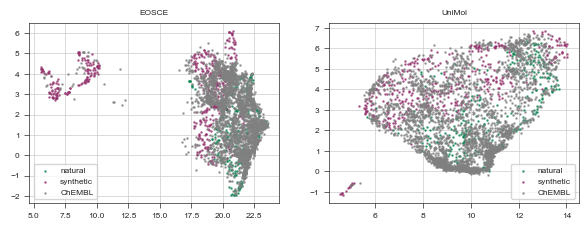

In [22]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 5:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi_eos2gw4.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 5:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 5:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 5:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi_eos39co.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 5:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 5:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()